In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import scipy.optimize as sop
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

mosprime3m = pd.read_csv('mosprime3m.csv',header=None,
                         index_col=0, names=['r3m'])['r3m']
mosprime3m_between = pd.read_csv('mosprime3m_between.csv', header=None,
                                 index_col=0, names=['r3m'])['r3m']
mosprime3m_short = pd.read_csv('mosprime3m_short.csv', header=None,
                               index_col=0, names=['r3m'])['r3m']


\begin{align*}
& dr_t = (\theta(t) - a r_t) dt + \sigma dW_t \\
& \theta(t) := const
\end{align*}

In [2]:
def HW1_path_cst(r0, days, theta, a, vol):
    # параметры модели
    r0 = r0 # начальная ставка
    T = days # число лет
    a = a # альфа 
    theta = theta
    vol = vol # волатильность
    # симуляция
    I = 1 
    dt = 1 / 252.
    # путь
    rand = np.random.standard_normal((T, I)) # генерация случайных величин
    r = np.zeros_like(rand) # матрица ставок
    r[0] = r0 # начальное значение
    for t in range(1, T): 
        r[t] = (r[t - 1] +  theta * dt + vol * rand[t] * np.sqrt(dt))/ (1 + a * dt)
    HW1 = pd.DataFrame(r[:, 0], columns=['index'])
    HW1 = HW1.values.flatten()
    return HW1


def HW1_p_cst(data, opt, num_paths=10, alpha=0.7, title='Calibrated HW1 Short Rate Simulation'):
    for i in range(num_paths):
        plt.plot(HW1_path_cst(data[0], len(data), opt[0], opt[1],
                      opt[2]), lw=0.8, alpha=alpha)
    plt.title(title)
    plt.plot(data.values.flatten(), label = 'data')
    plt.legend()
    plt.tight_layout
    plt.show()
    
def HW1_ml_final_diff_cst(p0, penalty=np.inf):
    theta, a, vol = p0
    if theta < 0.0 or vol < 0.0:
        return penalty 
    x = data.values
    dx = np.diff(data.values)
    dt = np.array([1/252]*len(dx))
    sigma1 = vol * np.sqrt((1-np.exp(-2 * a * dt))/(2 * a))
    sigma = np.sqrt (vol ** 2 * dt + (sigma1 * a * dt) ** 2) 
    mu1 = data[:-1] * np.exp(-a * dt) + (theta / a) * (1 - np.exp(-a * dt)) 
    mu = (theta - a * mu1)*dt
    const = -1/2 * len(dx) * np.log(2 * np.pi)
    sum1 = - np.sum(np.log(sigma))
    sum2 = - np.sum(((dx-mu)/(np.sqrt(2) * sigma))**2)
    L = - (const + sum1 + sum2)
    return L

In [3]:
data = mosprime3m_short

In [4]:
p1 = np.array([0.01, 0.01, 0.01])
p2 = np.array([0.1,  0.1, 0.1])
p3 = np.array([0.6,  0.6, 0.6])
p4 = np.array([1.13736131e-02, 2.38530484e-01, 2.20405094e-01])

Optimization terminated successfully.
         Current function value: -204.970004
         Iterations: 131
         Function evaluations: 236
[ 0.02593679 -0.13515874  0.5352478 ]


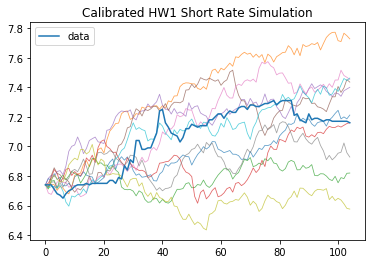

In [9]:
HW1_ml_ex1 = sop.fmin(HW1_ml_final_diff_cst, p1,
               maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001)

print(HW1_ml_ex1)
HW1_p_cst(data, HW1_ml_ex1, num_paths=10)

Optimization terminated successfully.
         Current function value: -206.043219
         Iterations: 189
         Function evaluations: 344
[41.3323051   5.71141424  0.52958594]


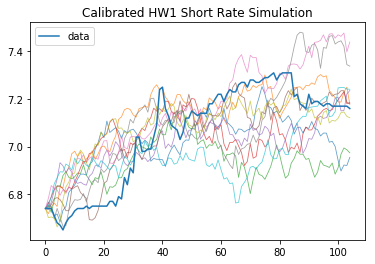

In [10]:
HW1_ml_ex2 = sop.fmin(HW1_ml_final_diff_cst, p2,
               maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001)

print(HW1_ml_ex2)
HW1_p_cst(data, HW1_ml_ex2, num_paths=10)

Optimization terminated successfully.
         Current function value: -206.043219
         Iterations: 135
         Function evaluations: 250
[41.33237987  5.71142513  0.52958594]


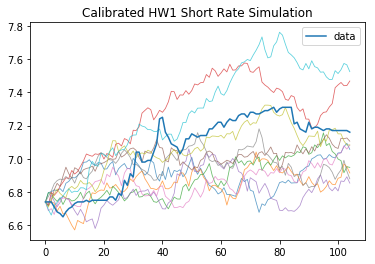

In [11]:
HW1_ml_ex3 = sop.fmin(HW1_ml_final_diff_cst, p3,
               maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001)

print(HW1_ml_ex3)
HW1_p_cst(data, HW1_ml_ex3, num_paths=10)

Optimization terminated successfully.
         Current function value: -206.043219
         Iterations: 180
         Function evaluations: 320
[41.33235856  5.71142216  0.52958604]


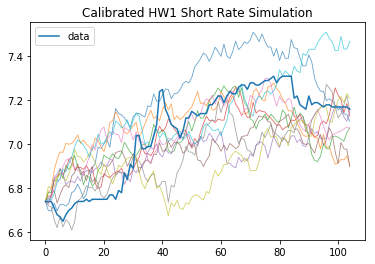

In [12]:
HW1_ml_ex4 = sop.fmin(HW1_ml_final_diff_cst, p4,
               maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001)

print(HW1_ml_ex4)
HW1_p_cst(data, HW1_ml_ex4, num_paths=10)

In [13]:
data = mosprime3m_between

Optimization terminated successfully.
         Current function value: -1238.940266
         Iterations: 114
         Function evaluations: 207
[ 7.03817926e-08 -3.45046479e-01  7.20957049e-01]


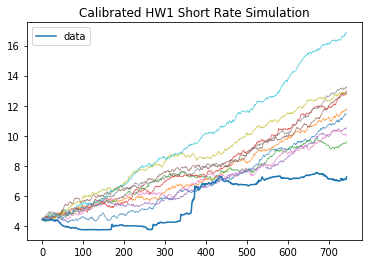

In [14]:
HW1_ml_ex1 = sop.fmin(HW1_ml_final_diff_cst, p1,
               maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001)

print(HW1_ml_ex1)
HW1_p_cst(data, HW1_ml_ex1, num_paths=10)

Optimization terminated successfully.
         Current function value: -1242.362645
         Iterations: 128
         Function evaluations: 226
[0.97370882 0.00211227 0.72320271]


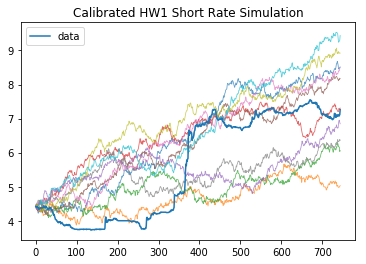

In [15]:
HW1_ml_ex2 = sop.fmin(HW1_ml_final_diff_cst, p2,
               maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001)

print(HW1_ml_ex2)
HW1_p_cst(data, HW1_ml_ex2, num_paths=10)

Optimization terminated successfully.
         Current function value: -1242.362645
         Iterations: 122
         Function evaluations: 215
[0.97373491 0.00211767 0.72320243]


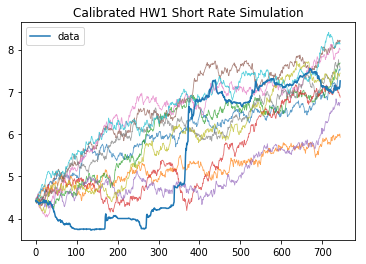

In [16]:
HW1_ml_ex3 = sop.fmin(HW1_ml_final_diff_cst, p3,
               maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001)

print(HW1_ml_ex3)
HW1_p_cst(data, HW1_ml_ex3, num_paths=10)

Optimization terminated successfully.
         Current function value: -1242.186511
         Iterations: 77
         Function evaluations: 141
[ 0.01789441 -0.15769408  0.72339636]


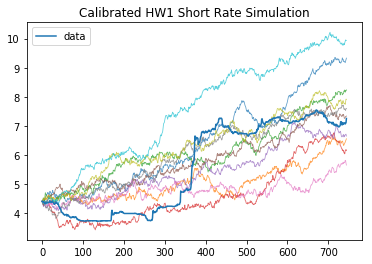

In [17]:
HW1_ml_ex4 = sop.fmin(HW1_ml_final_diff_cst, p4,
               maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001)

print(HW1_ml_ex4)
HW1_p_cst(data, HW1_ml_ex4, num_paths=10)

In [ ]:
#Nelder-Mead
Powell
#CG 
BFGS
#Newton-CG
L-BFGS-B
TNC
COBYLA ####!
#SLSQP
#dogleg
#trust-ncg

In [10]:
method = 'COBYLA'

-205.0231985452365 True [1.04965033 0.00949429 0.53507578]


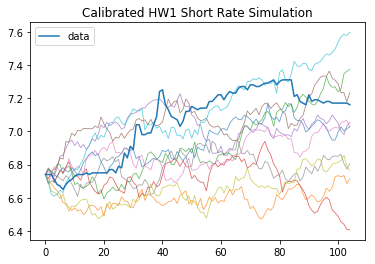

-205.03462075750625 True [1.27287696 0.04112688 0.53497096]


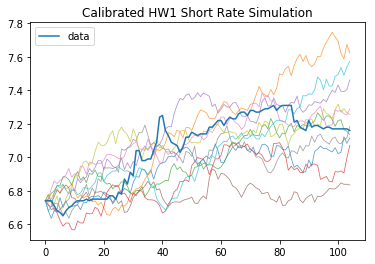

-205.06124857318514 True [1.79858548 0.11540178 0.53488182]


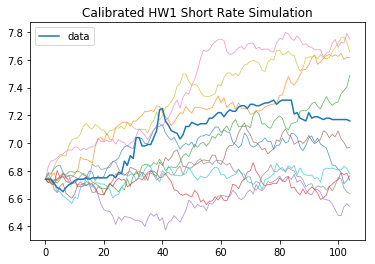

-205.03446609562485 True [1.26986377 0.04072361 0.53498608]


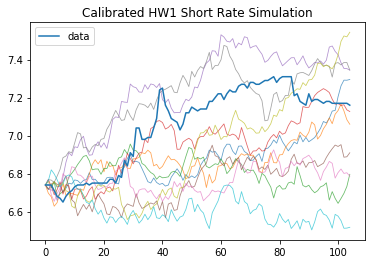

In [11]:
HW1_ml_ex1 = sop.minimize(HW1_ml_final_diff_cst, p1,method=method)

print(HW1_ml_ex1.fun, HW1_ml_ex1.success, HW1_ml_ex1.x)
HW1_p_cst(data, HW1_ml_ex1.x, num_paths=10)

HW1_ml_ex2 = sop.minimize(HW1_ml_final_diff_cst, p2, method=method)

print(HW1_ml_ex2.fun, HW1_ml_ex2.success, HW1_ml_ex2.x)
HW1_p_cst(data, HW1_ml_ex2.x, num_paths=10)

HW1_ml_ex3 = sop.minimize(HW1_ml_final_diff_cst, p3, method=method)

print(HW1_ml_ex3.fun, HW1_ml_ex3.success, HW1_ml_ex3.x)

HW1_p_cst(data, HW1_ml_ex3.x, num_paths=10)

HW1_ml_ex4 = sop.minimize(HW1_ml_final_diff_cst, p4, method=method)

print(HW1_ml_ex4.fun, HW1_ml_ex4.success, HW1_ml_ex4.x)
HW1_p_cst(data, HW1_ml_ex4.x, num_paths=10)

In [33]:
def rolling_HW1_cst(db=mosprime3m, periods=21, p0=np.array([0.1,  0.1, 0.1])):
    date_start_end = (pd.date_range(end = db.index.min(), periods=1, freq='d') + periods - 1).strftime('%Y-%m-%d')[0]
    end_dates = pd.date_range(start=date_start_end, end = db.index.max(), freq='d').strftime('%Y-%m-%d')
    df_cal_HW1_cst = pd.DataFrame(columns=["theta", "a", "vol"], index=end_dates)
    for i in tqdm(end_dates):
        x = pd.date_range(end = i, periods=periods, freq='d').strftime('%Y-%m-%d') # добавить ошибку на неправильный формат
        global data
        data = db.loc[x].dropna() # ошибку на формат датафрейма
        opt_HW1_cst = sop.minimize(HW1_ml_final_diff_cst, p0, method='COBYLA').x
        df_cal_HW1_cst.loc[i] = opt_HW1_cst
    return df_cal_HW1_cst

In [ ]:
db21_HW1 = rolling_HW1_cst(periods=21)

  0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
db252_HW1 = rolling_HW1_cst(periods=252)

  4%|▍         | 146/3750 [01:58<48:46,  1.23it/s]

KeyboardInterrupt: 

In [12]:
db=mosprime3m
periods=21
p0=np.array([0.1,  0.1, 0.1])

In [13]:
date_start_end = (pd.date_range(end = db.index.min(), periods=1, freq='d') + periods - 1).strftime('%Y-%m-%d')[0]
end_dates = pd.date_range(start=date_start_end, end = db.index.max(), freq='d').strftime('%Y-%m-%d')
df_cal_HW1_cst = pd.DataFrame(columns=["theta", "a", "vol"], index=end_dates)

In [14]:
date_start_end

'2007-01-29'

In [15]:
end_dates

array(['2007-01-29', '2007-01-30', '2007-01-31', ..., '2017-12-20',
       '2017-12-21', '2017-12-22'], dtype='<U10')

In [16]:
df_cal_HW1_cst.head()

,theta,a,vol
2007-01-29,NaN,NaN,NaN
2007-01-30,NaN,NaN,NaN
2007-01-31,NaN,NaN,NaN
2007-02-01,NaN,NaN,NaN
2007-02-02,NaN,NaN,NaN


In [17]:
i = end_dates[0]

In [28]:
x = pd.date_range(end = i, periods=periods, freq='d').strftime('%Y-%m-%d') # добавить ошибку на неправильный формат
global data
data = db.loc[x].dropna() # ошибку на формат датафрейма

In [29]:
data

2007-01-09    5.61
2007-01-10    5.58
2007-01-11    5.46
2007-01-12    5.51
2007-01-15    5.52
2007-01-16    5.49
2007-01-17    5.48
2007-01-18    5.43
2007-01-19    5.39
2007-01-22    5.43
2007-01-23    5.45
2007-01-24    5.47
2007-01-25    5.44
2007-01-26    5.44
2007-01-29    5.50
Name: r3m, dtype: float64

In [25]:
data = mosprime3m_short

In [26]:
data.head()

2012-04-02    6.74
2012-04-03    6.74
2012-04-04    6.74
2012-04-05    6.71
2012-04-06    6.68
Name: r3m, dtype: float64

In [27]:
sop.minimize(HW1_ml_final_diff_cst, p0, method='COBYLA')

     fun: -205.03462075750625
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 77
  status: 1
 success: True
       x: array([1.27287696, 0.04112688, 0.53497096])

In [ ]:
opt_HW1_cst = sop.minimize(HW1_ml_final_diff_cst, p0, method='COBYLA').x

In [ ]:
opt_HW1_cst